In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSE_366/autism_screening.csv')
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.0,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [ ]:
df.tail()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.0,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO
703,1,0,1,1,1,0,1,1,1,1,...,f,White-European,no,no,Cyprus,no,8.0,18 and more,Self,YES


# Data Preprocessing

In [ ]:
# Replace
df = df.replace('?', np.nan)

In [ ]:
# Rename
df.rename(columns={'jundice': 'jaundice'}, inplace=True)

In [ ]:
# Rename
df.rename(columns={'austim': 'autism'}, inplace=True)

In [ ]:
# Check missing values
df.isnull().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


<Axes: >

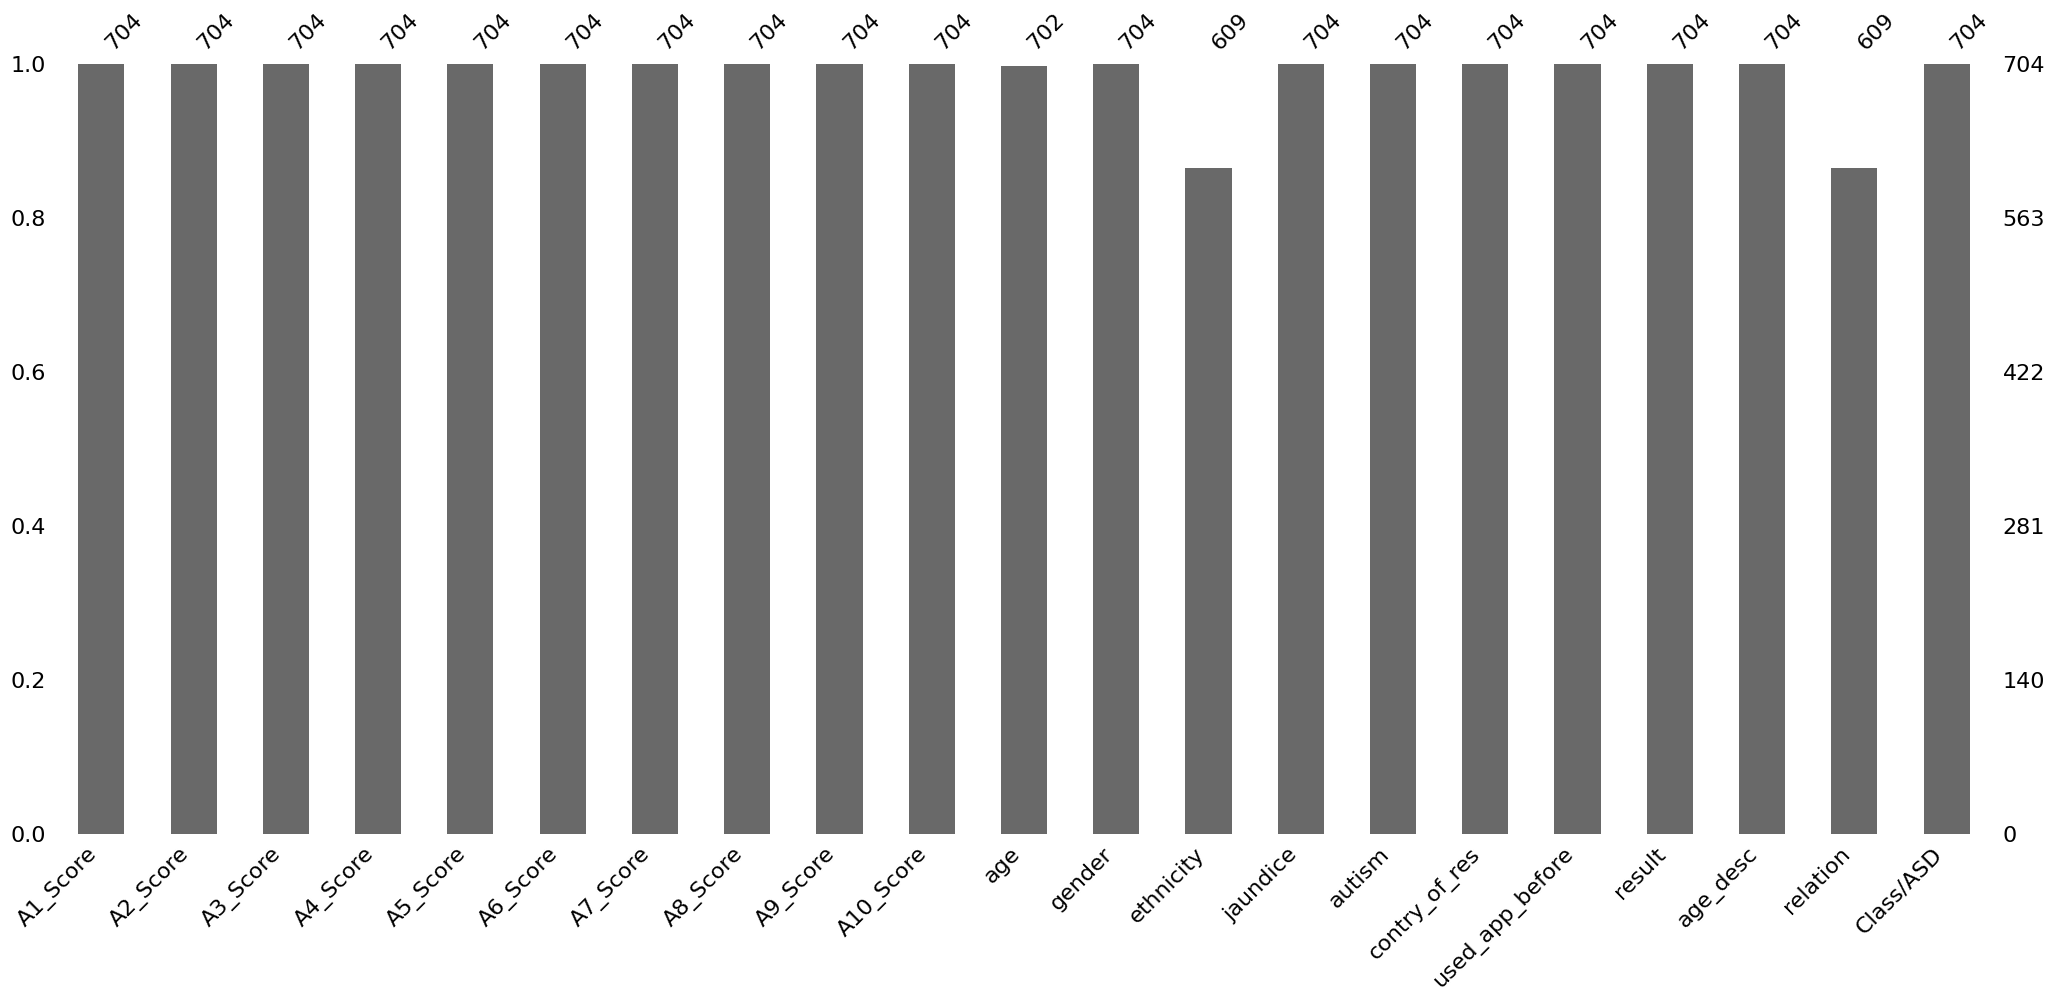

In [ ]:
# Missing values visualisation
msno.bar(df)

In [ ]:
# Recheck Head
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2.0,18 and more,NaN,NO


In [ ]:
# Handeling missing values
median_value = df['age'].median()
df['age'] = df['age'].fillna(median_value)

In [ ]:
# Handeling missing values
mode_value = df['relation'].mode()[0]
df['relation'] = df['relation'].fillna(mode_value)

In [ ]:
# Handeling missing values
mode_value = df['ethnicity'].mode()[0]
df['ethnicity'] = df['ethnicity'].fillna(mode_value)

In [ ]:
# Rechecking missing values
df.isnull().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


# Visualization

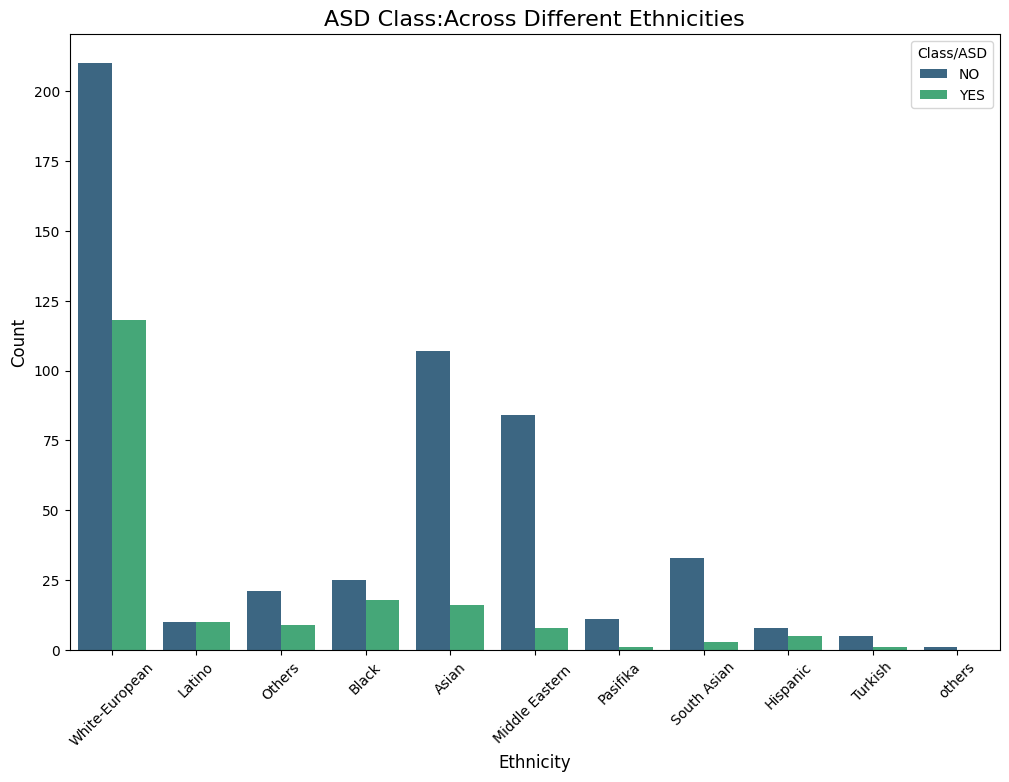

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='ethnicity', hue='Class/ASD', palette='viridis')
plt.title('ASD Class:Across Different Ethnicities', fontsize=16)
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

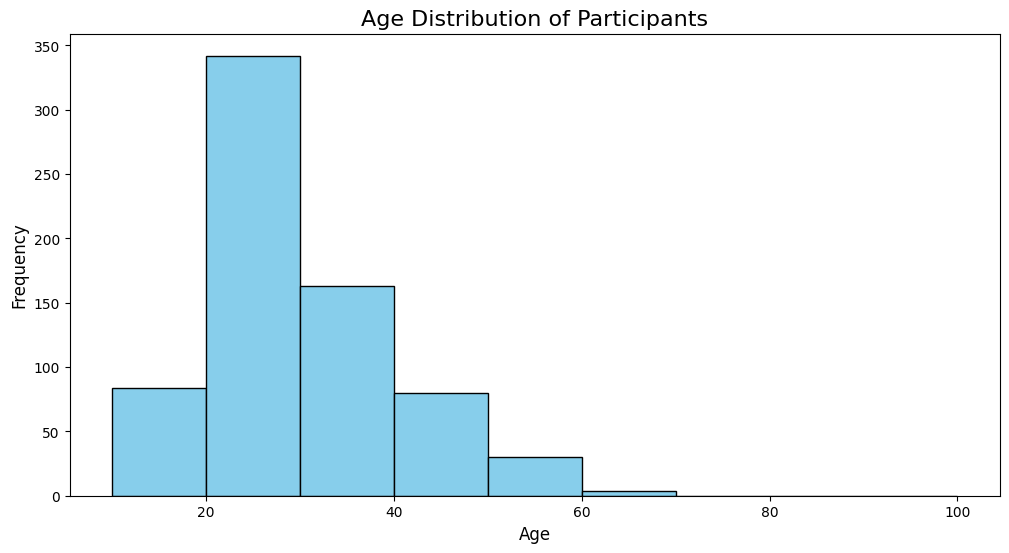

In [ ]:
custom_bins = [10, 20, 30, 40, 50, 60, 70, 80, 100]
plt.figure(figsize=(12, 6))
plt.hist(df['age'], bins=custom_bins, edgecolor='black', color='skyblue')
plt.title('Age Distribution of Participants', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Data Cleaning & Preparation

In [ ]:
df['gender'].value_counts()

,count
gender,
m,367
f,337


In [ ]:
# Define the mapping dictionary
gender_mapping = {
    'm': 0,
    'f': 1,
}

# Apply the mapping
df['gender'] = df['gender'].map(gender_mapping)

In [ ]:
df['ethnicity'].value_counts()

,count
ethnicity,
White-European,328
Asian,123
Middle Eastern,92
Black,43
South Asian,36
Others,30
Latino,20
Hispanic,13
Pasifika,12


In [ ]:
# Checking issue with ethnicity
print(df['ethnicity'].unique())

['White-European' 'Latino' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']


In [ ]:
ethnicity_mapping = {
    'White-European': 0,
    'Asian': 1,
    'Middle Eastern ': 2,
    'Black': 3,
    'South Asian': 4,
    'Others': 5,
    'Latino': 6,
    'Hispanic': 7,
    'Pasifika': 8,
    'Turkish': 9,
    'others': 10,
}

# Apply the mapping
df['ethnicity'] = df['ethnicity'].map(ethnicity_mapping)

In [ ]:
df['jaundice'].value_counts()

,count
jaundice,
no,635
yes,69


In [ ]:
# Define the mapping dictionary
jaundice_mapping = {
    'no': 0,
    'yes': 1,
}

# Apply the mapping
df['jaundice'] = df['jaundice'].map(jaundice_mapping)

In [ ]:
df['autism'].value_counts()

,count
autism,
no,613
yes,91


In [ ]:
# Define the mapping dictionary
autism_mapping = {
    'no': 0,
    'yes': 1,
}

# Apply the mapping
df['autism'] = df['autism'].map(autism_mapping)

In [ ]:
df['relation'].value_counts()

,count
relation,
Self,617
Parent,50
Relative,28
Others,5
Health care professional,4


In [ ]:
# Define the mapping dictionary
relation_mapping = {
    'Self': 0,
    'Parent': 1,
    'Relative': 2,
    'Others': 3,
    'Health care professional': 4,
}

# Apply the mapping
df['relation'] = df['relation'].map(relation_mapping)

In [ ]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
NO,515
YES,189


In [ ]:
# Define the mapping dictionary
asd_mapping = {
    'NO': 0,
    'YES': 1,
}

# Apply the mapping
df['Class/ASD'] = df['Class/ASD'].map(asd_mapping)

In [ ]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,515
1,189


In [ ]:
df= df.drop(columns=['contry_of_res', 'age_desc', 'used_app_before'], axis=1)
df


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,1,0,0,0,6.0,0,0
1,1,1,0,1,0,0,0,1,0,1,24.0,0,6,0,1,5.0,0,0
2,1,1,0,1,1,0,1,1,1,1,27.0,0,6,1,1,8.0,1,1
3,1,1,0,1,0,0,1,1,0,1,35.0,1,0,0,1,6.0,0,0
4,1,0,0,0,0,0,0,1,0,0,40.0,1,0,0,0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,1,0,0,0,7.0,0,1
700,1,0,0,0,0,0,0,1,0,1,34.0,0,7,0,0,3.0,1,0
701,1,0,1,1,1,0,1,1,0,1,24.0,1,0,0,0,7.0,0,1
702,1,0,0,1,1,0,1,0,1,1,35.0,0,4,0,0,6.0,0,0


# Visualization

<Axes: >

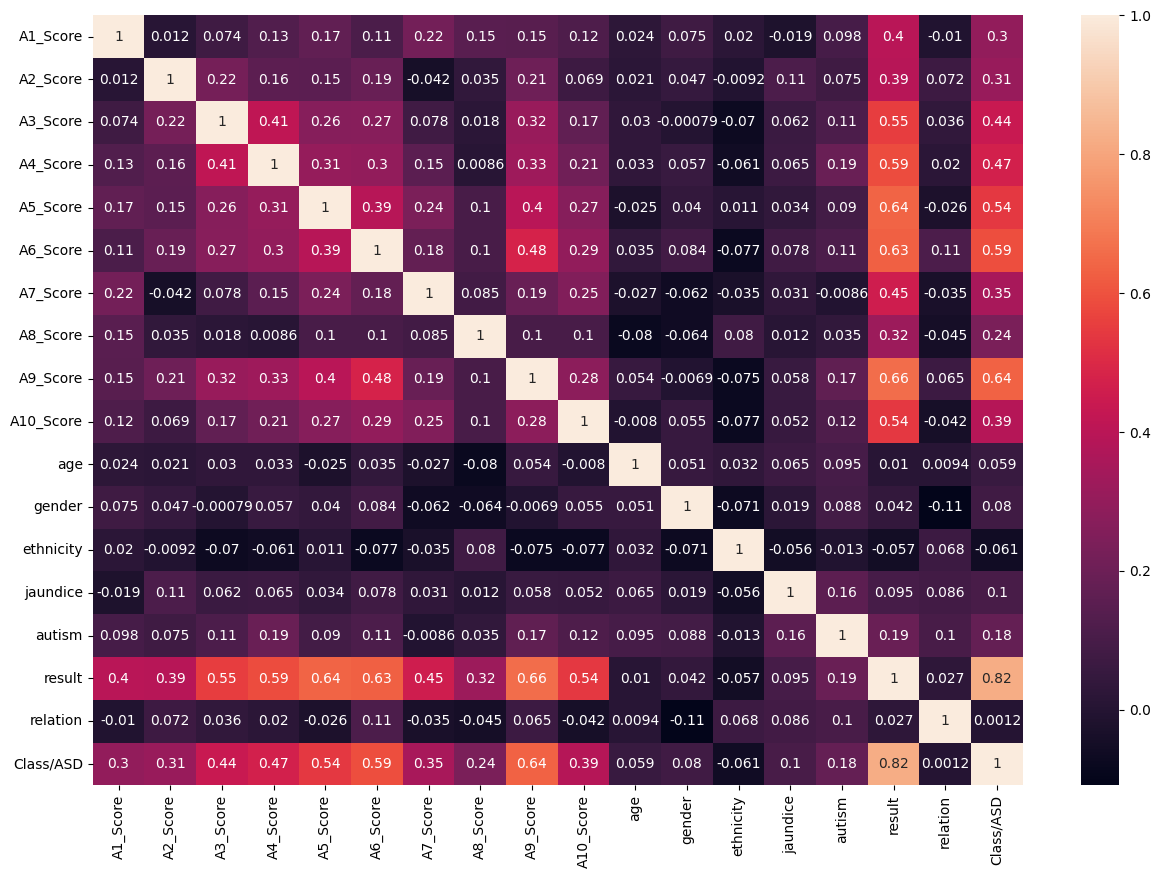

In [ ]:
# Correlation Matrix
df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

# Model Training

In [ ]:
# Columns in df has been dropped previousy
X=df.drop(columns=['Class/ASD'], axis=1)
y=df['Class/ASD']

In [ ]:
# Test & Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# LOGISTIC REGRESSION

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall (Sensitivity): 1.0
F1-Score: 1.0


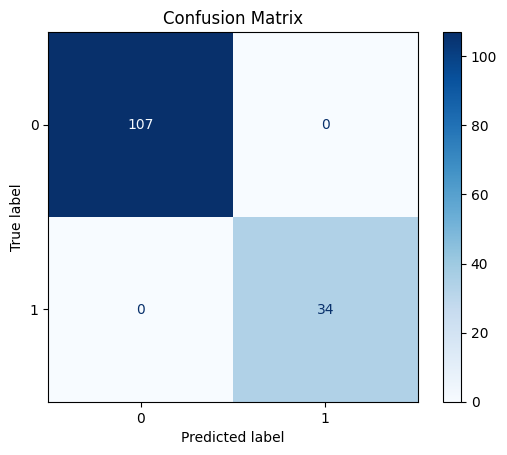

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()


# SUPPORT VECTOR MACHINE

In [ ]:
svm = SVC(kernel='linear', random_state=0)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall (Sensitivity): 1.0
F1-Score: 1.0


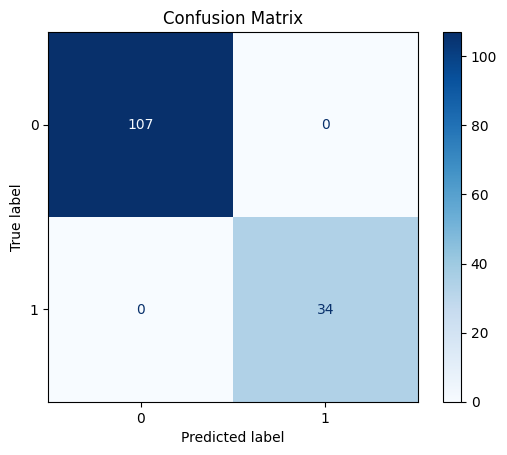

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

# DECISION TREE

In [ ]:
dc = DecisionTreeClassifier(random_state=51)
dc.fit(X_train, y_train)
y_pred = dc.predict(X_test)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall (Sensitivity): 1.0
F1-Score: 1.0


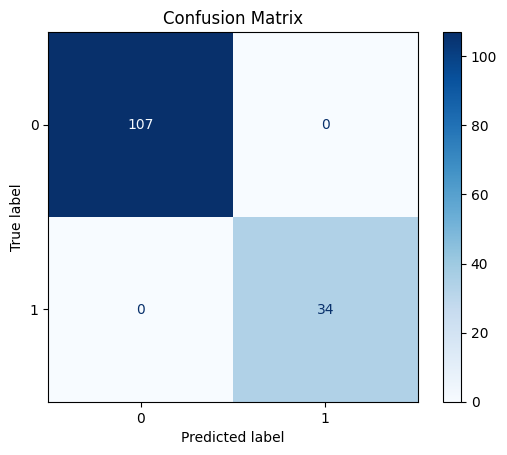

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

# ARTIFICIAL NEURAL NETWORK (ANN)

In [ ]:
# Building ANN
ann = Sequential([
    Dense(16, input_shape=(X_train.shape[1],), activation='relu'), # 1st hidden layer, shape=input=17
    Dense(8, activation='relu'), # 2nd Hidden layer
    Dense(1, activation='sigmoid') # Output layer for binary
])

# Compile model
ann.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification loss
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train model
ann.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)
# Evaluate model
loss, accuracy = ann.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6599 - loss: 0.6129
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7473 - loss: 0.5346  
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6943 - loss: 0.5671 
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7210 - loss: 0.5044 
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7307 - loss: 0.4819 
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7142 - loss: 0.4855 
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7087 - loss: 0.4784 
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7067 - loss: 0.4602 
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7085 - loss: 0.4686 
Epoch 10/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7741 - loss: 0.4141 
Epoch 11/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8231 - loss: 0.3932 
Epoch 12/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

In [ ]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,301 (5.09 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 868 (3.39 KB)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


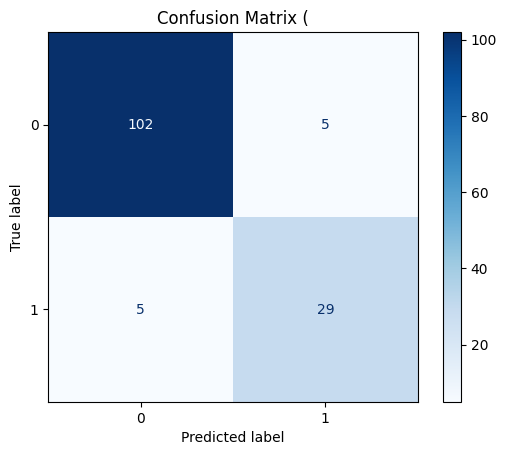

In [ ]:
# Predict probabilities
y_pred_prob = ann.predict(X_test)

# Convert probabilities to binary
y_pred = (y_pred_prob > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.title("Confusion Matrix (")
plt.show()

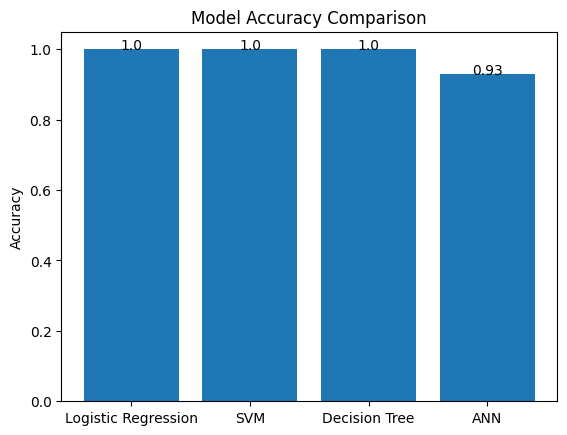

In [55]:
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'ANN']
accuracies = [1.0, 1.0, 1.0, 0.93]
plt.bar(model_names, accuracies)
for i in range(len(accuracies)):
    plt.text(i, accuracies[i], round(accuracies[i], 2), ha='center')

plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()